# <font color='#0E6655'> <b> <center> CUSTOMER SEGMENTATION </center> </b> </font>

## <font color='blue'> <b> Table of Contents </b> </font>

1. [Objectives](#1)
2. [Modules](#2)
3. [Loading, exploring and pre-processing data](#3)
4. [Clustering with K-Means](#4)



<a name="1"></a> 
## <font color='green'> <b> 1. Objectives </font> </a>

Use K-Means for customer segmentation.

<a name="2"></a> 
## <font color='green'> <b> 2. Modules </font> </a>

In [59]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


from sklearn.manifold import TSNE


import warnings

warnings.filterwarnings('ignore')


<a name="3"></a> 
## <font color='green'> <b> 3. Data loading, exploration and pre-processing </font> </a>

In [60]:
!cd data && ls

Customer_Segmentation.csv


In [61]:
df = pd.read_csv('data/Customer_Segmentation.csv')
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
0,1,41,2,6,19,124.0,1073.0,6.3
1,2,47,1,26,100,4582.0,8218.0,12.8
2,3,33,2,10,57,6111.0,5802.0,20.9
3,4,29,2,4,19,681.0,516.0,6.3
4,5,47,1,31,253,9308.0,8908.0,7.2


In [62]:
df.isnull().sum()

Customer Id        0
Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
DebtIncomeRatio    0
dtype: int64

We can see that all variables are numerical and we have no null values.
Our next step will be standarize this numerical features.

In [63]:
X = df.values[:,1:] # we take all values except of course the index in the dataframe
X = np.nan_to_num(X)

# normalize
X = StandardScaler().fit_transform(X)

In [64]:
X[:2]

array([[ 0.74291541,  0.31212243, -0.37878978, -0.71845859, -0.62196731,
        -0.52096003, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 ,  1.38432469,  1.49318129,
         1.55956554,  0.39138677]])

<a name="4"></a> 
## <font color='green'> <b> 4. Clustering with K-Means</font> </a>

We're implementing K-means. To determine the optimal value of K, we'll utilize the elbow method.

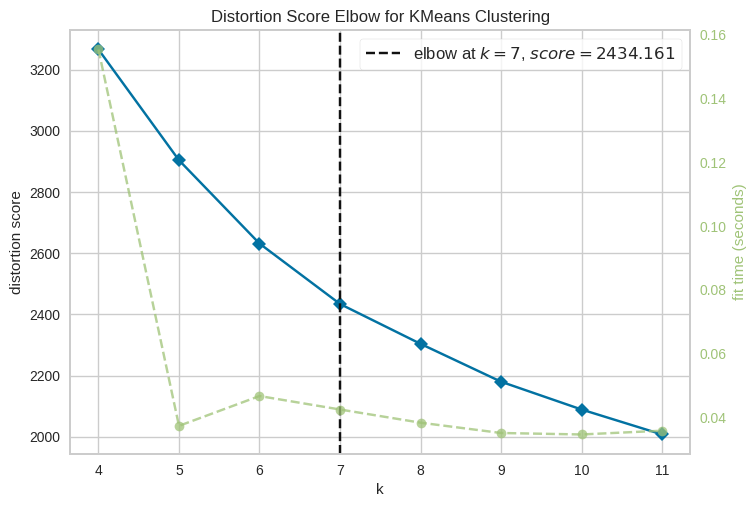

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [65]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

With this method, the best value of k is 7.

In [66]:
# number of clusters
num_clusters = 7

# run k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)

# labels
labels = kmeans.labels_
kmeans.labels_[0:10] 


array([1, 3, 3, 2, 6, 5, 1, 0, 2, 5], dtype=int32)

Plotting with t-SNE.

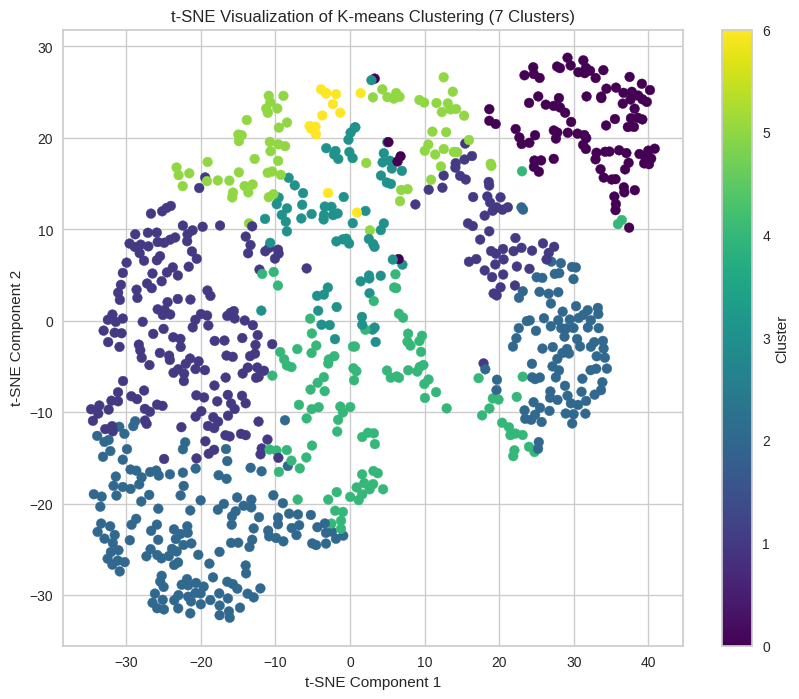

In [67]:
# Apply t-SNE to reduce dimensions to 2D
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)

# Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('t-SNE Visualization of K-means Clustering (7 Clusters)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [45]:
# insert the labels
df.insert(0, 'Cluster Labels', kmeans.labels_) #df["Cluster Labels"] = labels
df.head()

,Cluster Labels,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
0,1,1,41,2,6,19,124.0,1073.0,6.3
1,3,2,47,1,26,100,4582.0,8218.0,12.8
2,3,3,33,2,10,57,6111.0,5802.0,20.9
3,2,4,29,2,4,19,681.0,516.0,6.3
4,6,5,47,1,31,253,9308.0,8908.0,7.2


Let' see some of the clusters:

In [53]:
df.loc[df['Cluster Labels'] == 0].head(3)

,Cluster Labels,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
7,0,8,42,3,0,64,279.0,3945.0,6.6
10,0,11,44,3,8,88,285.0,5083.0,6.1
14,0,15,28,3,2,20,233.0,1647.0,9.4


In [54]:
df.loc[df['Cluster Labels'] == 1].head(3)

,Cluster Labels,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
0,1,1,41,2,6,19,124.0,1073.0,6.3
6,1,7,38,2,4,56,442.0,454.0,1.6
11,1,12,34,2,9,40,374.0,266.0,1.6


We can check the centroid values by averaging the features in each cluster.

In [48]:
df.groupby('Cluster Labels').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
Cluster Labels,,,,,,,,
0,409.727273,33.070707,3.444444,4.404040,41.010101,884.579798,2267.954848,8.608081
1,433.628319,39.141593,1.230088,10.584071,41.955752,871.078761,1782.162655,7.472566
2,425.000000,28.062500,1.371094,4.140625,25.355469,512.156211,1126.999023,7.541797
3,433.589041,41.054795,2.054795,14.013699,80.520548,4231.047123,9105.917808,17.710959
4,433.000000,32.627273,1.554545,5.872727,31.327273,2026.046909,3600.464455,20.394545
5,402.277778,44.958333,1.888889,19.541667,101.847222,1500.666250,3178.225417,5.588889
6,433.285714,46.285714,1.928571,22.642857,213.142857,11737.785714,16239.857143,16.821429


Number of elements per cluster.


In [49]:
elements_per_cluster = [len(df.loc[df['Cluster Labels'] == n].index) for n in range(0,num_clusters)]
elements_per_cluster


[99, 226, 256, 73, 110, 72, 14]

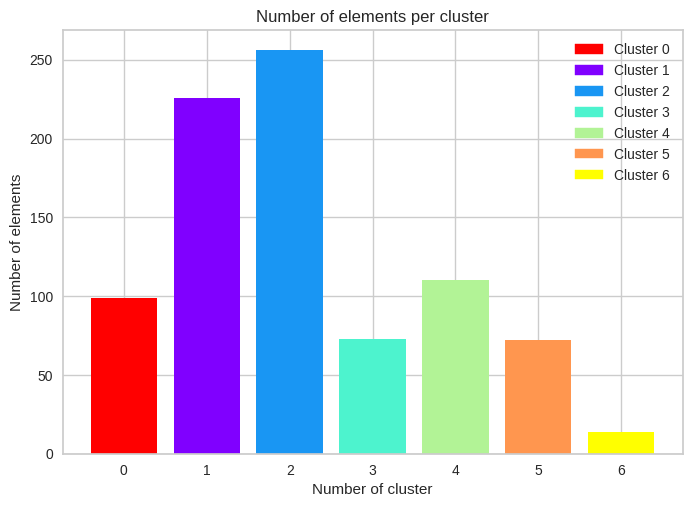

In [71]:
# plotting the number of elements per cluster
x = [0,1,2,3,4,5,6]

color = ['#ff0000', '#8000ff', '#1996f3', '#4df3ce', '#b2f396', '#ff964f','yellow']

plt.bar(x,elements_per_cluster,color=color)


plt.title('Number of elements per cluster')
plt.xlabel('Number of cluster')
plt.ylabel('Number of elements')

colors = {'Cluster 0':'red', 'Cluster 1':'#8000ff', 'Cluster 2':'#1996f3','Cluster 3':'#4df3ce',
         'Cluster 4':'#b2f396','Cluster 5':'#ff964f', 'Cluster 6':'yellow'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

plt.show()